The period between 1970 and 1982 marked a significant shift in the United States car industry. American production shifted from heavy, powerful six- and eight-cylinder cars with poor gas mileage to lighter, less powerful, four-cylinder cars with higher fuel efficiency. The global auto industry–including Americans and their European and Japanese competitors–raised overall miles per gallon (MPG) by focusing on four-cylinder cars and making them more fuel efficient.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

In [57]:
auto = pd.read_csv('auto_industry.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [58]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


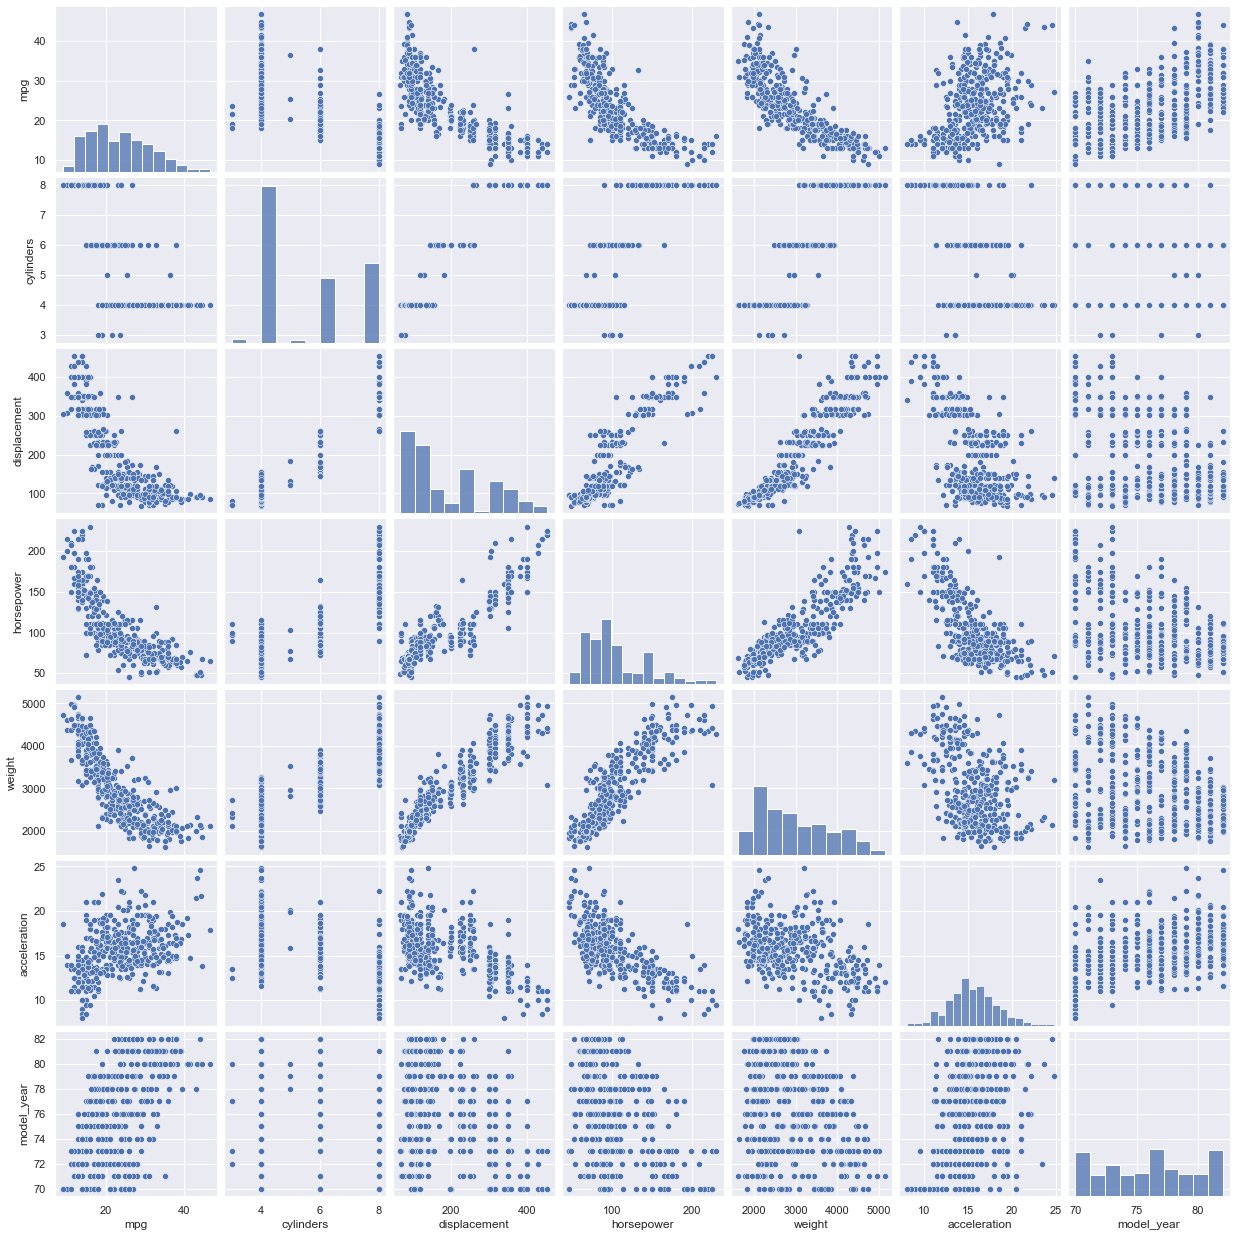

In [59]:
sns.pairplot(auto)

In [60]:
# mpg tem uma distribuição interesssante , seria normal?
# mpg vs displacement, horsepower, weight parecem ter relação não linear
# displacement vs horsepower, weight parece linear
# horsepower vs weight, acceleration parece linear
# acceleration tem um distribuição normal das frequências


## Procure por valores faltantes nas colunas do dataframe e faça as substituições mais razoáveis.

In [61]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [62]:
auto[auto['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [63]:
#substituir o hp NaN com regressão e machine learning
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [64]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [65]:
# seleção dos valores x
auto[auto['horsepower'].isnull() == False][['mpg', 'cylinders', 'displacement', 'weight',
       'acceleration']]

,mpg,cylinders,displacement,weight,acceleration
0,18.0,8,307.0,3504,12.0
1,15.0,8,350.0,3693,11.5
2,18.0,8,318.0,3436,11.0
3,16.0,8,304.0,3433,12.0
4,17.0,8,302.0,3449,10.5
...,...,...,...,...,...
393,27.0,4,140.0,2790,15.6
394,44.0,4,97.0,2130,24.6
395,32.0,4,135.0,2295,11.6
396,28.0,4,120.0,2625,18.6


In [66]:
# seleção dos valores y
auto[auto['horsepower'].isnull() == False][['horsepower']]

,horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0
...,...
393,86.0
394,52.0
395,84.0
396,79.0


In [67]:
# regressor.fit(X_train, y_train)
regressor.fit(
    auto[auto['horsepower'].isnull() == False][['mpg', 'cylinders', 'displacement', 'weight','acceleration']] , 
    auto[auto['horsepower'].isnull() == False][['horsepower']]
)

LinearRegression()

In [68]:
#y_pred = regressor.predict(X_test)
regressor.predict(auto[auto['horsepower'].isnull()][['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']])

array([[ 60.88217898],
       [ 96.12772311],
       [ 56.61396223],
       [105.19087152],
       [ 77.30693185],
       [ 80.17221379]])

In [69]:
auto[auto['horsepower'].isnull()].index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [70]:
auto.loc[auto['horsepower'].isnull(), 'horsepower'] = regressor.predict(auto[auto['horsepower'].isnull()][['mpg', 'cylinders', 'displacement', 'weight',
       'acceleration']])

In [71]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [72]:
auto.iloc[374]

mpg                         23
cylinders                    4
displacement               151
horsepower             80.1722
weight                    3035
acceleration              20.5
model_year                  82
origin                     usa
name            amc concord dl
Name: 374, dtype: object

## Calcule quantos modelos foram lançados em anos pares

In [73]:
sum = 0
for model in auto['model_year']:
  if model % 2 == 0:
    sum += 1
print(sum)


214


## Crie uma coluna para a marca do veículo e outra para o nome

In [74]:
 auto['brand_name'] =  auto['name'].str.split().str[0]
 auto['car_name'] = auto['name'].str.partition()[2]
 auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand_name,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw,pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,ranger


## É posível identificar alguma relação entre mpg e acceleration?

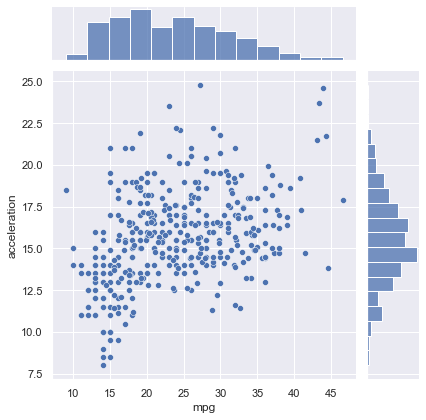

In [75]:
sns.jointplot(x="mpg", y="acceleration", data = auto)

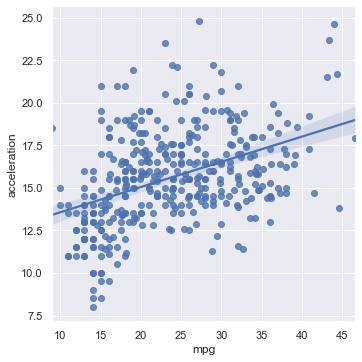

In [76]:
sns.lmplot(x='mpg',y='acceleration',data= auto,fit_reg=True) #pelo gráfico há uma tendência de quanto > aceleração > será o mpg, 
#no próximo código veremos se há correlção entre as duas variáveis

In [77]:
auto_corr = auto.corr().round(2) #há uma correlação fraca entre mpg e aceleração R=0,42
auto_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.00,-0.78,-0.80,-0.78,-0.83,0.42,0.58
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.51,-0.35
displacement,-0.80,0.95,1.00,0.90,0.93,-0.54,-0.37
horsepower,-0.78,0.84,0.90,1.00,0.87,-0.69,-0.41
weight,-0.83,0.90,0.93,0.87,1.00,-0.42,-0.31
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.00,0.29
model_year,0.58,-0.35,-0.37,-0.41,-0.31,0.29,1.00


## Explore a função [`get_group()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) para criar um subconjunto dos dados e analisar apenas as entradas referentes à `'origin' = usa`.

In [78]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand_name,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino


In [79]:
auto_usa = auto.groupby('origin').get_group('usa')
auto_usa


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand_name,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro,chevrolet,camaro
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,mustang gl
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,ranger


## Remova os elementos duplicados e crie uma tabela de consumo em (Km/L), altere os nomes dos países de orígem para que todos comecem com letras maiúsculas.

In [80]:
# Removendo duplicadas
auto.drop_duplicates()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand_name,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,ford,mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,vw,pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,ford,ranger


In [81]:
auto.duplicated().sum()


0

In [82]:
# crie uma tabela de consumo em (Km/L), altere os nomes dos países de origem para que todos comecem com letras maiúsculas.
consumo_Km_L = pd.DataFrame(auto)
new_origin = []
for name in consumo_Km_L['origin']:
  name = name[0].upper() + name[1:]
  new_origin.append(name)
new_origin
consumo_Km_L['origin'] = new_origin
consumo_Km_L


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand_name,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,ford,torino
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,ford mustang gl,ford,mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,vw pickup,vw,pickup
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,dodge rampage,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,ford ranger,ford,ranger


In [83]:
#coluna km/L solução 1
for item in consumo_Km_L['mpg']:
  item = item * 0.425
  print(item)

7.6499999999999995
6.375
7.6499999999999995
6.8
7.225
6.375
5.95
5.95
5.95
6.375
6.375
5.95
6.375
5.95
10.2
9.35
7.6499999999999995
8.924999999999999
11.475
11.049999999999999
10.625
10.2
10.625
11.049999999999999
8.924999999999999
4.25
4.25
4.675
3.8249999999999997
11.475
11.9
10.625
10.625
8.075
6.8
7.225
8.075
7.6499999999999995
5.95
5.95
5.95
5.95
5.1
5.5249999999999995
5.5249999999999995
7.6499999999999995
9.35
8.075
7.6499999999999995
9.775
11.9
12.75
12.75
13.174999999999999
14.875
11.475
11.049999999999999
10.2
10.625
9.775
8.5
8.924999999999999
5.5249999999999995
5.95
6.375
5.95
7.225
4.675
5.5249999999999995
5.1
5.5249999999999995
8.075
6.375
5.5249999999999995
5.5249999999999995
5.95
7.6499999999999995
9.35
8.924999999999999
11.049999999999999
9.35
11.9
9.775
11.9
11.475
5.5249999999999995
5.95
5.5249999999999995
5.95
6.375
5.1
5.5249999999999995
5.5249999999999995
5.95
5.5249999999999995
5.1
5.5249999999999995
7.6499999999999995
6.8
7.6499999999999995
7.6499999999999995
9.7

In [84]:
#coluna Km/L solução 2
Km_L = np.asarray(consumo_Km_L['mpg'])
fator = np.repeat(0.425, len(Km_L), axis = 0)
coluna_Km_L = fator * Km_L
consumo_Km_L['Km_L'] = coluna_Km_L
consumo_Km_L

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand_name,car_name,Km_L
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,chevrolet,chevelle malibu,7.650
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,buick,skylark 320,6.375
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,plymouth,satellite,7.650
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,amc,rebel sst,6.800
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,ford,torino,7.225
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,ford mustang gl,ford,mustang gl,11.475
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,vw pickup,vw,pickup,18.700
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,dodge rampage,dodge,rampage,13.600
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,ford ranger,ford,ranger,11.900


In [85]:
consumo_Km_L.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
 9   brand_name    398 non-null    object 
 10  car_name      398 non-null    object 
 11  Km_L          398 non-null    float64
dtypes: float64(5), int64(3), object(4)
memory usage: 37.4+ KB


## Use a função [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) para criar uma tabela dinâmica que calcule a média do consumo (miles/galon) `'mpg'`. Divida o dataframe em ano de modelo `'model_year'` e número de cilindros `'cylinders'`. Estude e descreva os resultados.

In [86]:
table_model_cylinders =  pd.pivot_table(auto, index = ['model_year', 'cylinders'],   aggfunc = {'mpg': np.mean})
table_model_cylinders 

mpg
model_year cylinders           
70         4          25.285714
           6          20.500000
           8          14.111111
71         4          27.461538
           6          18.000000
           8          13.428571
72         3          19.000000
           4          23.428571
           8          13.615385
73         3          18.000000
           4          22.727273
           6          19.000000
           8          13.200000
74         4          27.800000
           6          17.857143
           8          14.200000
75         4          25.250000
           6          17.583333
           8          15.666667
76         4          26.766667
           6          20.000000
           8          14.666667
77         3          21.500000
           4          29.107143
           6          19.500000
           8          16.000000
78         4          29.576471
           5          20.300000
           6          19.066667
           8          19.050000
79         4          31.525000
           5          25.400000
           6          22.950000
           8          18.630000
80         3          23.700000
           4          34.612000
           5          36.400000
           6          25.900000
81         4          32.814286
           6          23.428571
           8          26.600000
82         4          32.071429
           6          28.333333

In [87]:
table_model_cylinders = table_model_cylinders.reset_index()
table_model_cylinders

,model_year,cylinders,mpg
0,70,4,25.285714
1,70,6,20.500000
2,70,8,14.111111
3,71,4,27.461538
4,71,6,18.000000
5,71,8,13.428571
6,72,3,19.000000
7,72,4,23.428571
8,72,8,13.615385
9,73,3,18.000000


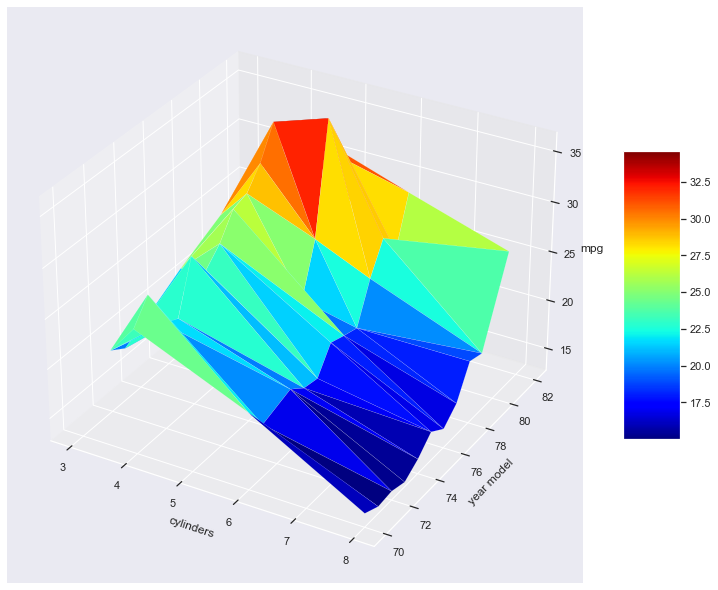

In [88]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sys import argv

z = table_model_cylinders['mpg']
x = table_model_cylinders['cylinders']
y = table_model_cylinders['model_year']

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_zlabel('mpg')
ax.set_xlabel('cylinders')
ax.set_ylabel('year model')

plt.show()

## Agrupe o dataframe por origem  `'origin'` e número cilindros `'cylinders'` e calcule a média da potência `'horsepower'` dos carros fabricados.

In [34]:
table_origin_cylinders =  pd.pivot_table(auto, index = ['origin', 'cylinders'],   aggfunc = {'horsepower': np.mean})
table_origin_cylinders.reset_index(inplace = True)
table_origin_cylinders

,origin,cylinders,horsepower
0,Europe,4,77.951125
1,Europe,5,82.333333
2,Europe,6,113.500000
3,Japan,3,99.250000
4,Japan,4,75.579710
5,Japan,6,115.833333
6,Usa,4,81.003406
7,Usa,6,99.623348
8,Usa,8,158.300971


In [35]:
auto.groupby(['origin', 'cylinders'])['horsepower'].mean()

origin  cylinders
Europe  4             77.951125
        5             82.333333
        6            113.500000
Japan   3             99.250000
        4             75.579710
        6            115.833333
Usa     4             81.003406
        6             99.623348
        8            158.300971
Name: horsepower, dtype: float64

## Faça uma segregação ainda mais severa com os dados, criando uma lista de intervalos de anos (dois a dois) como corte para a leitura da média de consumo dos veículos produzidos, como agrupados por origem `'origin'`, ano de modelo `'year_model'` e número de cilindros `'cylinders'`. Discuta a evolução na média de consumo, por ano e por país e por cilindro.

In [36]:
auto.groupby(pd.cut(auto["model_year"], np.arange(70, 84, 2))).mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Km_L
model_year,,,,,,,,
"(70, 72]",19.982143,5.696429,214.062500,112.783610,3116.571429,15.133929,71.500000,8.492411
"(72, 74]",19.358209,5.925373,222.567164,115.897429,3200.970149,15.074627,73.402985,8.227239
"(74, 76]",20.960938,5.625000,201.421875,101.093750,3124.703125,15.992188,75.531250,8.908398
"(76, 78]",23.760937,5.406250,183.750000,102.046875,2921.109375,15.643750,77.562500,10.098398
"(78, 80]",29.394828,4.982759,161.258621,89.462152,2746.000000,16.374138,79.500000,12.492802
"(80, 82]",31.045000,4.400000,131.983333,81.174652,2487.083333,16.478333,81.516667,13.194125


In [37]:
auto.groupby(['origin', 'model_year', 'cylinders']).mean()

mpg  displacement  horsepower       weight  \
origin model_year cylinders                                                     
Europe 70         4          25.200000    107.800000   86.200000  2309.200000   
       71         4          28.750000     95.000000   74.000000  2024.000000   
       72         4          22.000000    111.000000   79.600000  2573.200000   
       73         4          24.000000    105.000000   81.857143  2335.714286   
       74         4          27.000000     93.166667   74.166667  2139.333333   
...                                ...           ...         ...          ...   
Usa    81         4          30.950000    120.500000   75.125000  2330.625000   
                  6          20.925000    207.250000   98.250000  3166.250000   
                  8          26.600000    350.000000  105.000000  3725.000000   
       82         4          29.647059    128.470588   83.833660  2585.882353   
                  6          28.333333    225.000000  102.333333  2931.666667   

                             acceleration       Km_L  
origin model_year cylinders                           
Europe 70         4             16.500000  10.710000  
       71         4             16.750000  12.218750  
       72         4             18.700000   9.350000  
       73         4             16.428571  10.200000  
       74         4             15.333333  11.475000  
...                                   ...        ...  
Usa    81         4             15.950000  13.153750  
                  6             15.525000   8.893125  
                  8             19.000000  11.305000  
       82         4             16.782353  12.600000  
                  6             16.033333  12.041667  

[76 rows x 6 columns]

## Crie uma nova coluna que reflita a região mundial em que as origens dos veículos se encontram, certifique-se de que essa coluna também conterá valores que começam com letras maiúsculas.

In [38]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand_name,car_name,Km_L
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,chevrolet,chevelle malibu,7.650
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,buick,skylark 320,6.375
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,plymouth,satellite,7.650
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,amc,rebel sst,6.800
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,ford,torino,7.225


In [39]:
auto['origin'].unique()

array(['Usa', 'Japan', 'Europe'], dtype=object)

In [40]:
auto_origin = auto.groupby(auto["origin"]).sum()
auto_origin

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Km_L
origin,,,,,,,,
Europe,1952.4,291,7640.0,5611.920894,169631,1175.1,5307,829.77
Japan,2405.6,324,8114.0,6307.000000,175477,1277.6,6118,1022.38
Usa,5000.8,1556,61229.5,29509.372987,837121,3743.4,18827,2125.34


In [41]:
auto_origin

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Km_L
origin,,,,,,,,
Europe,1952.4,291,7640.0,5611.920894,169631,1175.1,5307,829.77
Japan,2405.6,324,8114.0,6307.000000,175477,1277.6,6118,1022.38
Usa,5000.8,1556,61229.5,29509.372987,837121,3743.4,18827,2125.34


# Bônus - estatística

## Apresente a centralidade, desvio padrão e distribuição (histograma) das variáveis e também boxplots

In [53]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Km_L
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.091191,2970.424623,15.568090,76.010050,9.993693
std,7.815984,1.701004,104.269838,38.381124,846.841774,2.757689,3.697627,3.321793
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,3.825000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,7.437500
50%,23.000000,4.000000,148.500000,92.500000,2803.500000,15.500000,76.000000,9.775000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,12.325000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,19.805000


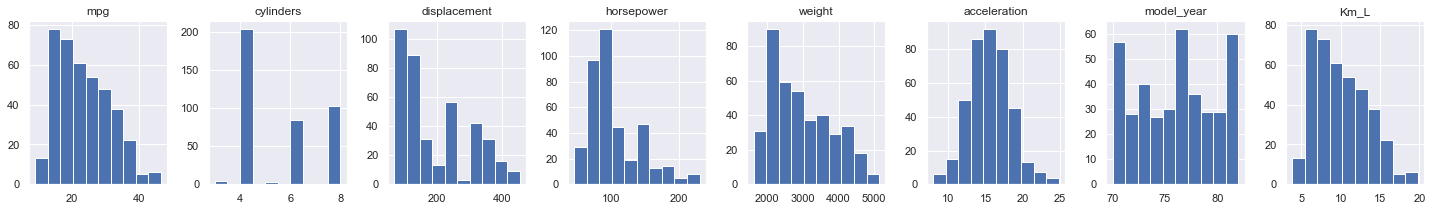

In [54]:
fig_hist, axis = plt.subplots(1,8,figsize=(25, 3))
auto.hist(ax=axis);

C:\Users\stesl\miniconda3\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


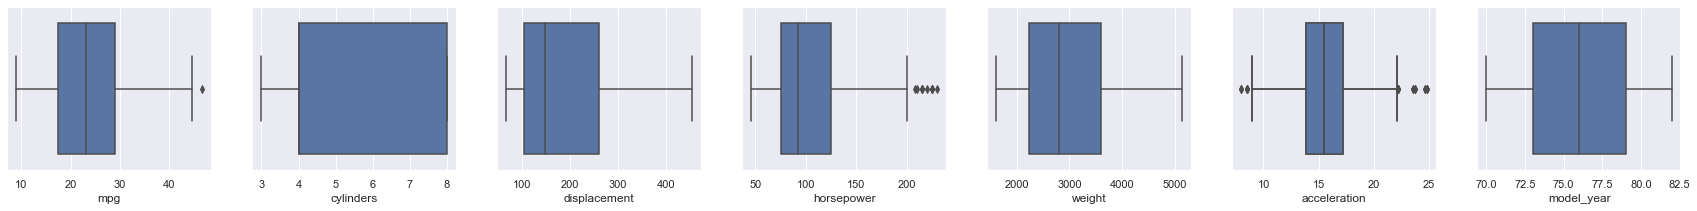

In [55]:
plt.figure(figsize = (30,3))

box1 = plt.subplot(171)
box1 = sns.boxplot( x = auto['mpg'])

box2 = plt.subplot(172)
box2 = sns.boxplot(x = auto['cylinders'])

box3 = plt.subplot(173)
box3 = sns.boxplot(x = auto['displacement'])

box4 = plt.subplot(174)
box4 = sns.boxplot(x = auto['horsepower'])

box5 = plt.subplot(175)
box5 = sns.boxplot(x = auto['weight'])

box6 = plt.subplot(176)
box6 = sns.boxplot(x = auto['acceleration'])

box6 = plt.subplot(176)
box6 = sns.boxplot(x = auto['acceleration'])

box7 = plt.subplot(177)
box7 = sns.boxplot(x = auto['model_year'])
plt.show()